In [1]:
import numpy as np
import pandas as pd
import random

from trmf import trmf
from Forecast import AutoRegressionModel, NaiveModel, MeanModel
from RollingCV import RollingCV

import matplotlib.pyplot as plt
%matplotlib inline

# Experiments on electricity data

#### 1. Experiment description:

** Models: ** Naive, Mean, AutoRegression and TRMF models;

** Lags: ** {1, 24};

** Forecast horizon: ** 1, 5, 10, 20;

** Metrics: ** Normalized deviation (ND), Normalized Root Mean Squared Error (NRMSE).

##### 2. Load data.

In [2]:
electricity = pd.read_table('LD2011_2014.txt', sep=';', decimal=',')

In [11]:
electricity

,Unnamed: 0,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,...,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
0,2011-01-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2011-01-01 00:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2011-01-01 00:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2011-01-01 01:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2011-01-01 01:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140251,2014-12-31 23:00:00,2.538071,22.048364,1.737619,150.406504,85.365854,303.571429,11.305822,282.828283,68.181818,...,276.945039,28200.0,1616.033755,1363.636364,29.986962,5.851375,697.102722,176.961603,651.026393,7621.621622
140252,2014-12-31 23:15:00,2.538071,21.337127,1.737619,166.666667,81.707317,324.404762,11.305822,252.525253,64.685315,...,279.800143,28300.0,1569.620253,1340.909091,29.986962,9.947338,671.641791,168.614357,669.354839,6702.702703
140253,2014-12-31 23:30:00,2.538071,20.625889,1.737619,162.601626,82.926829,318.452381,10.175240,242.424242,61.188811,...,284.796574,27800.0,1556.962025,1318.181818,27.379400,9.362200,670.763828,153.589316,670.087977,6864.864865
140254,2014-12-31 23:45:00,1.269036,21.337127,1.737619,166.666667,85.365854,285.714286,10.175240,225.589226,64.685315,...,246.252677,28000.0,1443.037975,909.090909,26.075619,4.095963,664.618086,146.911519,646.627566,6540.540541


In [12]:
# transpose and sum by hours
data = electricity.values[:,1:].T.reshape((35064*370,4)).sum(axis=1).reshape((370,35064))[:,10064:].astype(float)[:, -750:]
data.shape

(370, 750)

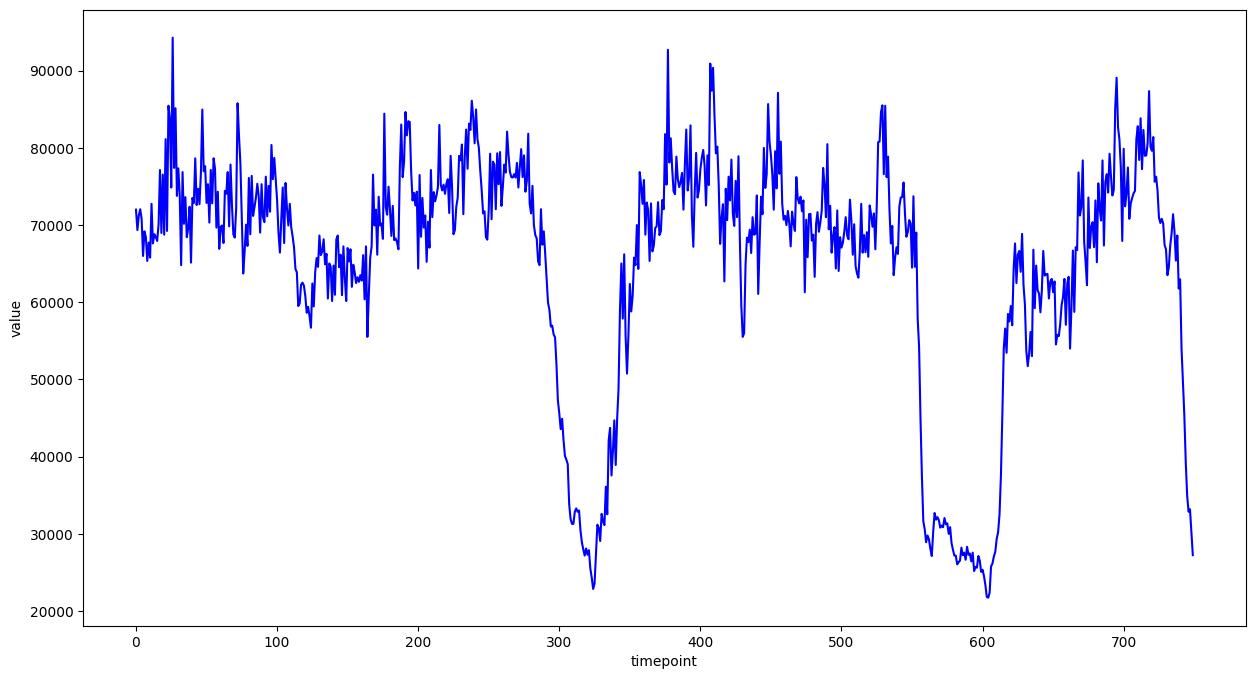

In [15]:
plt.figure(figsize=(15,8))
plt.plot(data[-1], color='blue')

plt.xlabel('timepoint')
plt.ylabel('value')

plt.show()

In [5]:
N = 370
T = 750
K = 8
lags = [1, 24]
L = len(lags)

In [19]:
T_train = 700
T_test = 50
train = data[:, :T_train]
test = data[:, T_train:]

In [20]:
# TRMF model
lambda_f = 1.
lambda_x = 1.
lambda_w = 1.
eta = 1.
alpha = 1000.
max_iter = 1000


model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter)

In [21]:
model.fit(train, max_iter=10000)

d:\TMU codes\thesis codes\codes\TRMF\trmf.py:322: RuntimeWarning: overflow encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
d:\TMU codes\thesis codes\codes\TRMF\trmf.py:297: RuntimeWarning: invalid value encountered in add
  grad_T_x = z_1 + z_2
d:\TMU codes\thesis codes\codes\TRMF\trmf.py:298: RuntimeWarning: invalid value encountered in add
  return - 2 * np.dot(self.F.T, self.mask * (self.Y - np.dot(self.F, self.X))) + self.lambda_x * grad_T_x + self.eta * self.X
d:\TMU codes\thesis codes\codes\TRMF\trmf.py:320: RuntimeWarning: invalid value encountered in subtract
  z_1 = self.X - np.roll(X_l, lag, axis=1)
d:\TMU codes\thesis codes\codes\TRMF\trmf.py:322: RuntimeWarning: invalid value encountered in multiply
  z_2 = - (z_1 * np.roll(self.X, lag, axis=1)).sum(axis=1)
c:\Users\User.MORADI-PC\anaconda3\envs\tf\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims

In [22]:
train_preds = np.dot(model.F, model.X)

In [23]:
model.F

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

##### 3. Apply models

In [6]:
# Naive model
for h in [1, 5, 10, 20]:
    model = NaiveModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Naive model performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                                    round(np.array(scores_nrmse).mean(),3)))

Naive model performance ND/NRMSE (h = 1): 0.344/0.5
Naive model performance ND/NRMSE (h = 5): 0.688/0.951
Naive model performance ND/NRMSE (h = 10): 1.091/1.429
Naive model performance ND/NRMSE (h = 20): 1.363/1.73


In [7]:
# Mean model
for h in [1, 5, 10, 20]:
    model = MeanModel()
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('Mean model performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                          round(np.array(scores_nrmse).mean(),3)))

Mean model performance ND/NRMSE (h = 1): 1.0/1.19
Mean model performance ND/NRMSE (h = 5): 1.0/1.201
Mean model performance ND/NRMSE (h = 10): 1.0/1.204
Mean model performance ND/NRMSE (h = 20): 1.0/1.188


In [8]:
# AR model
for h in [1, 5, 10, 20]:
    model = AutoRegressionModel(lags)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('AR performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                           round(np.array(scores_nrmse).mean(),3)))

AR performance ND/NRMSE (h = 1): 0.427/0.557
AR performance ND/NRMSE (h = 5): 0.612/0.831
AR performance ND/NRMSE (h = 10): 0.627/0.876
AR performance ND/NRMSE (h = 20): 0.58/0.802


In [9]:
# TRMF model
lambda_f = 1.
lambda_x = 1.
lambda_w = 1.
eta = 1.
alpha = 1000.
max_iter = 1000

for h in [1, 5, 10, 20]:
    model = trmf(lags, K, lambda_f, lambda_x, lambda_w, alpha, eta, max_iter)
    scores_nd = RollingCV(model, data, T-9-h, h, T_step=1, metric='ND')
    scores_nrmse = RollingCV(model, data, T-9-h, h, T_step=1, metric='NRMSE')
    print('TRMF performance ND/NRMSE (h = {}): {}/{}'.format(h, round(np.array(scores_nd).mean(),3),\
                                                    round(np.array(scores_nrmse).mean(),3)))

KeyboardInterrupt: 

### Results Electricity Data (ND/NRMSE)

| | h=1 | h=5 | h=10 | h=20 ||
|------|------|------|------|
| Naive | **0.344/0.5** | 0.688/0.951 | 1.091/1.429 | 1.363/1.73 |
| Mean | 1.0/1.19 | 1.0/1.201 | 1.0/1.204 | 1.0/1.188 |
| AutoRegression | 0.427/0.557 | **0.612/0.831** | **0.627/0.876** | **0.58**/0.802 |
| TRMF | 0.639/0.828 | 0.727/0.95 | 0.681/0.936 | 0.584/**0.799** |
